In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

#### Input (X): Sử dụng dữ liệu từ t-100 đến t để dự đoán giá trị Close tại bước t+1.
#### Target (y): Lấy giá trị Close tại thời điểm t+1 làm mục tiêu.     
#### LSTM sẽ sử dụng dữ liệu của 100 phút trước đó để dự đoán giá trị của phút tiếp theo.
#### Giá trị dự đoán là giá Close tại thời điểm t+1.

In [2]:
import data as data_file

X_train, X_test, y_train, y_test, scaler, data = data_file.main()

print("Train size:", X_train.shape, "Test size:", X_test.shape, "Data size:", data.shape)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Columns in the data: Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Columns in the data: Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
           Adj Close          Close           High            Low  \
count   75004.000000   75004.000000   75004.000000   75004.000000   
mean    86983.018834   86983.018834   86983.019438   86983.018834   
std     12065.728442   12065.728442   12065.728906   12065.728442   
min     65198.042969   65198.042969   65198.042969   65198.042969   
25%     72531.271484   72531.271484   72531.271484   72531.271484   
50%     96477.439955   96477.439955   96477.441262   96477.439955   
75%     96477.439955   96477.439955   96477.441262   96477.439955   
max    101899.515625  101899.515625  101899.515625  101899.515625   

                Open        Volume  
count   75004.000000  7.500400e+04  
mean    86983.019438  1.913048e+07  
std     12065.728906  1.079070e+08  
min     65198.042969  0.000000

In [3]:
model = Sequential()

model.add(LSTM(128, activation='relu', return_sequences=True, kernel_initializer='glorot_uniform', input_shape=(X_train.shape[1], X_train.shape[2])))

# Loại bỏ ngẫu nhiên 10% số nút trong quá trình huấn luyện để giảm overfitting.
model.add(Dropout(0.1))

# return_sequences=False nghĩa là tầng này chỉ giữ lại trạng thái cuối cùng của chuỗi (last hidden state).
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(Dropout(0.1))

# Tầng đầu ra, dự đoán giá trị Close tại thời điểm t+1.
model.add(Dense(1))

# Compile mô hình
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])

print(model.summary())

# Huấn luyện mô hình
# Epoch: Số lần toàn bộ dữ liệu huấn luyện được duyệt qua (50 lần trong mô hình này).
# Batch size: Số mẫu trong một lô dữ liệu được đưa vào mô hình cùng lúc (32 mẫu).
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        69,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,593 (463.25 KB)

 Trainable params: 118,593 (463.25 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
1499/1499 ━━━━━━━━━━━━━━━━━━━━ 130s 86ms/step - loss: 0.1191 - mae: 0.1191 - val_loss: 0.1082 - val_mae: 0.1082
Epoch 2/50
1499/1499 ━━━━━━━━━━━━━━━━━━━━ 123s 82ms/step - loss: 0.0947 - mae: 0.0947 - val_loss: 0.0833 - val_mae: 0.0833
Epoch 3/50
1499/1499 ━━━━━━━━━━━━━━━━━━━━ 120s 80ms/step - loss: 0.0919 - mae: 0.0919 - val_loss: 0.0782 - val_mae: 0.0782
Epoch 4/50
1499/1499 ━━━━━━━━━━━━━━━━━━━━ 119s 79ms/step - loss: 0.0905 - mae: 0.0905 - val_loss: 0.0815 - val_mae: 0.0815
Epoch 5/50
1499/1499 ━━━━━━━━━━━━━━━━━━━━ 127s 84ms/step - loss: 0.0902 - mae: 0.0902 - val_loss: 0.0835 - val_mae: 0.0835
Epoch 6/50
1499/1499 ━━━━━━━━━━━━━━━━━━━━ 133s 88ms/step - loss: 0.0897 - mae: 0.0897 - val_loss: 0.0744 - val_mae: 0.0744
Epoch 7/50
1499/1499 ━━━━━━━━━━━━━━━━━━━━ 139s 93ms/step - loss: 0.0886 - mae: 0.0886 - val_loss: 0.0818 - val_mae: 0.0818
Epoch 8/50
1499/1499 ━━━━━━━━━━━━━━━━━━━━ 149s 99ms/step - loss: 0.0868 - mae: 0.0868 - val_loss: 0.0792 - val_mae: 0.0792
Epoch 9/50


In [4]:
y_pred = model.predict(X_test)

print("Shape of predictions:", y_pred.shape)

469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step
Shape of predictions: (14981, 1)


In [5]:
# Chuyển đổi giá trị dự đoán và thực tế về thang đo gốc
y_pred_original = scaler.inverse_transform(np.concatenate((y_pred, np.zeros((y_pred.shape[0], data.shape[1] - 1))), axis=1))[:, 0]
y_test_original = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], data.shape[1] - 1))), axis=1))[:, 0]

In [15]:
mse_original = mean_squared_error(y_test_original, y_pred_original)
rmse_original = np.sqrt(mse_original)
mae_original = mean_absolute_error(y_test_original, y_pred_original)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE Original: {mse_original}")
print(f"RMSE Original: {rmse_original}")
print(f"MAE Original: {mae_original}")

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

MSE Original: 47494456.125197925
RMSE Original: 6891.622169358817
MAE Original: 2596.6445878600853
MSE: 0.035259482768868304
RMSE: 0.18777508559142853
MAE: 0.07075041953167772


          Thời gian  Dự đoán (Predicted)  Giá trị thật (Actual)  Sai số (Error)
2024-12-01 16:23:00         69131.402711           96477.439955    27346.037244
2024-12-01 16:24:00         69102.027910           86704.485060    17602.457150
2024-12-01 16:25:00         69116.945006           68380.257812      736.687194
2024-12-01 16:26:00         69196.475507           96477.439955    27280.964448
2024-12-01 16:27:00         69335.375787           96477.439955    27142.064168
2024-12-01 16:28:00         69492.012952           96477.439955    26985.427003
2024-12-01 16:29:00         69652.374469           96477.439955    26825.065486
2024-12-01 16:30:00         69804.936175           96477.439955    26672.503780
2024-12-01 16:31:00         69951.304848           68981.492188      969.812660
2024-12-01 16:32:00         70092.836785           71201.070312     1108.233528


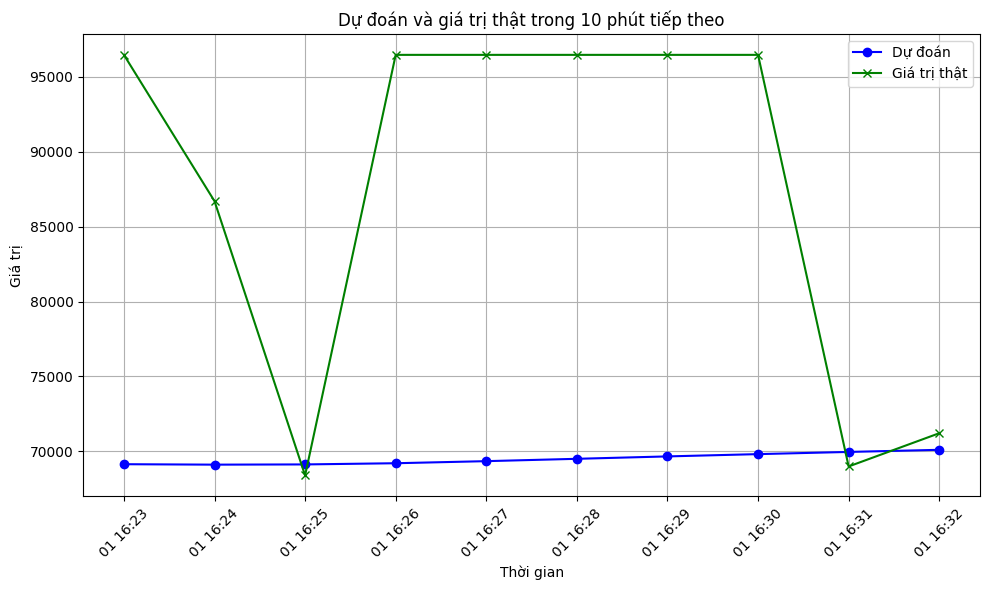

In [17]:
# Giả sử data là DataFrame gốc chứa toàn bộ thông tin
time_index_test = data.index[-len(X_test):]  # Lấy index cuối cùng tương ứng với X_test
time_index_test = time_index_test.tz_localize(None)  # Loại bỏ timezone nếu có

# Đặt thời gian dự đoán và đảm bảo không có timezone
input_datetime = pd.Timestamp('2024-11-06 01:00').tz_localize(None)

# Hàm lấy chỉ số gần nhất cho một thời gian nhập vào
def get_test_record_by_datetime(input_datetime, time_index_test):
    """
    Hàm tìm chỉ số gần nhất trong time_index_test cho thời gian nhập vào.
    """
    time_diff = (time_index_test - input_datetime).total_seconds()  # Tính chênh lệch thời gian
    closest_time_index = np.argmin(np.abs(time_diff))  # Tìm chỉ số có sự khác biệt nhỏ nhất
    return closest_time_index

def predict_future(input_datetime, X_test, y_test, time_index_test, model, scaler, num_minutes=10):
    """
    Hàm thực hiện dự đoán trong num_minutes phút tiếp theo từ thời gian nhập vào.
    """
    # Lấy index tương ứng với thời gian nhập vào
    index_for_input = get_test_record_by_datetime(input_datetime, time_index_test)

    # Lấy X_current tương ứng với chỉ số này
    X_current = X_test[index_for_input]

    # Khởi tạo danh sách kết quả
    future_predictions = []
    actual_values = []
    errors = []

    # Dự đoán liên tục trong num_minutes phút
    for i in range(num_minutes):
        # Dự đoán giá trị tiếp theo
        next_pred = model.predict(X_current.reshape(1, X_current.shape[0], X_current.shape[1]), verbose=0)[0, 0]

        # Lấy giá trị thực tế từ y_test
        actual_value = y_test[index_for_input + i] if index_for_input + i < len(y_test) else None

        # Tính sai số tuyệt đối giữa dự đoán và giá trị thực tế (nếu có)
        error = np.abs(next_pred - actual_value) if actual_value is not None else None

        # Thêm giá trị dự đoán, giá trị thực tế và sai số vào danh sách
        future_predictions.append(next_pred)
        actual_values.append(actual_value)
        errors.append(error)

        # Cập nhật đầu vào cho lần dự đoán tiếp theo
        X_current = np.roll(X_current, -1, axis=0)  # Lăn dữ liệu về bên trái (giữ lại 99 bước trước đó)
        X_current[-1] = np.array([next_pred] * X_current.shape[1])  # Thay thế giá trị cuối cùng bằng dự đoán mới

    # Chuyển đổi giá trị thật (Actual) về thang đo gốc
    actual_values_array = np.array([v if v is not None else 0 for v in actual_values]).reshape(-1, 1)
    actual_values_extended = np.zeros((len(actual_values), X_test.shape[2]))
    actual_values_extended[:, 0] = actual_values_array[:, 0]
    actual_values_original = scaler.inverse_transform(actual_values_extended)[:, 0]

    # Chuyển đổi giá trị dự đoán (Predicted) về thang đo gốc
    future_predictions_array = np.array(future_predictions).reshape(-1, 1)
    future_predictions_extended = np.zeros((len(future_predictions), X_test.shape[2]))
    future_predictions_extended[:, 0] = future_predictions_array[:, 0]
    future_predictions_original = scaler.inverse_transform(future_predictions_extended)[:, 0]

    # Chuyển đổi sai số (Error) về thang đo gốc
    errors_original = np.abs(actual_values_original - future_predictions_original)

    # Tạo DataFrame để hiển thị các giá trị dự đoán, giá trị thực tế và sai số
    future_df = pd.DataFrame({
        "Thời gian": time_index_test[index_for_input:index_for_input + num_minutes],
        "Dự đoán (Predicted)": future_predictions_original,
        "Giá trị thật (Actual)": actual_values_original,
        "Sai số (Error)": errors_original
    })

    # Hiển thị kết quả dự đoán, giá trị thật và sai số
    print(future_df.to_string(index=False))

    # Vẽ biểu đồ kết quả
    plt.figure(figsize=(10, 6))
    plt.plot(future_df["Thời gian"], future_df["Dự đoán (Predicted)"], marker='o', label="Dự đoán", color='b')
    plt.plot(future_df["Thời gian"], future_df["Giá trị thật (Actual)"], marker='x', label="Giá trị thật", color='g')
    plt.xlabel('Thời gian')
    plt.ylabel('Giá trị')
    plt.title('Dự đoán và giá trị thật trong {} phút tiếp theo'.format(num_minutes))
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Gọi hàm dự đoán
predict_future(input_datetime, X_test, y_test, time_index_test, model, scaler, num_minutes=10)
